## Customer Sentimental Analysis - Iphone 15 128gb

## Objective:

### As a Data Analyst at Flipkart, analyze customer sentiment towards the iPhone 15 128GB model by evaluating reviews using sentiment analysis. The goal is to gain insights into public perception, identify product strengths and weaknesses, and support decision-making.
## 1. Libraries and Tools:- **Selenium**: Web scraping automation.
- **BeautifulSoup**: HTML parsing.
- **Pandas**: Data cleaning and analysis.
- **TextBlob**: Sentiment analysis.
- **Matplotlib/Seaborn**: Data visualization.
ion.



In [97]:
# Import the necessary librariess
import requests 
import time
import pandas as pd
from bs4 import BeautifulSoup 

!pip install selenium

from selenium import webdriver
from selenium.webdriver.common.by import By 
from selenium.webdriver.common.keys import Keys

### 2. Data Collection (Web Scraping)

**Tools**: Selenium, BeautifulSoup  

**Steps**:
- Use **Selenium** to scrape at least **300 reviews** from Flipkart's **iPhone 15 128GB** product page.
- Extract **Username, Rating, and Review Text**.
- Handle **pagination** to collect reviews from multiple pages.


In [99]:

# Create empty lists to store the user data such as Name, City, Date of Purchase, Review & Rating
Names = [] 
Cities = [] 
Dates = [] 
Reviews = [] 
Ratings = []

# Assign the url of the flipkart website and use selenium to scrape data
url = """https://www.flipkart.com/apple-iphone-15-black-128-gb/product-reviews/
itm6ac6485515ae4?pid=MOBGTAGPTB3VS24W&lid=LSTMOBGTAGPTB3VS24WKFODHL&marketplace=FLIPKART"""

driver = webdriver.Chrome() 
driver.get(url)

while len(Names) < 320:
    time.sleep(2)
    soup = BeautifulSoup(driver.page_source, "html.parser")
    
    # Extract names
    names_elements= soup.find_all("p", {"class": "_2NsDsF AwS1CA"}) 
    for name in	names_elements:
        Names.append(name.text)
    
    # Extract cities
    city_elements = soup.find_all("p", {"class": "MztJPv"}) 
    for city in city_elements:
        Cities.append(city.text)
    
    # Extract dates
    dates_elements = soup.find_all("p", {"class": "_2NsDsF"}) 
    for date in dates_elements:
        Dates.append(date.text) 
        Actual_Dates = Dates[1::2]
    
    # Extract reviews
    reviews_elements = soup.find_all("div", {"class": "ZmyHeo"}) 
    for review in reviews_elements:
        Reviews.append(review.text)
    
    # Extract ratings
    ratings_elements = soup.find_all("div", class_ = "XQDdHH Ga3i8K") 
    for ratings in ratings_elements:
        Ratings.append(ratings.text)
    
    # Try to click the "Next" button
    try:
        next_button = driver.find_element(By.XPATH, "//span[text()='Next']")
        next_button.click() 
        time.sleep(5)
    except:
        break


In [100]:
min_length = min(len(Names), len(Cities), len(Actual_Dates), len(Reviews), len(Ratings))

Names = Names[:min_length]
Cities = Cities[:min_length]
Actual_Dates = Actual_Dates[:min_length]
Reviews = Reviews[:min_length]
Ratings = Ratings[:min_length]




In [101]:
max_length = max(len(Names), len(Cities), len(Actual_Dates), len(Reviews), len(Ratings))

Names += ["Unknown"] * (max_length - len(Names))
Cities += ["Unknown"] * (max_length - len(Cities))
Actual_Dates += ["Unknown"] * (max_length - len(Actual_Dates))
Reviews += ["Unknown"] * (max_length - len(Reviews))
Ratings += ["0"] * (max_length - len(Ratings))  # Assuming Ratings is numerical


In [102]:
df = pd.DataFrame({
    "Name": Names,
    "City": Cities,
    "Date": Actual_Dates,
    "Review": Reviews,
    "Ratings": Ratings
})

In [103]:
# Check the basic info of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Name     164 non-null    object
 1   City     164 non-null    object
 2   Date     164 non-null    object
 3   Review   164 non-null    object
 4   Ratings  164 non-null    object
dtypes: object(5)
memory usage: 6.5+ KB


In [104]:
# Drop the duplicates from the dataframe
df1 = df.copy()
df1 = df1.drop_duplicates() 
df1

,Name,City,Date,Review,Ratings
0,Ajin V,"Certified Buyer, Balaghat","Oct, 2023",High quality camera😍READ MORE,5
1,Mousam Guha Roy,"Certified Buyer, Matialihat","Oct, 2023",Very niceREAD MORE,4
2,Nikhil Kumar,"Certified Buyer, Meerut Division","Jan, 2024",Switch from OnePlus to iPhone I am stunned wit...,5
3,bijaya mohanty,"Certified Buyer, Baleshwar",9 months ago,Just go for it.Amazing one.Beautiful camera wi...,5
4,Prithivi Boruah,"Certified Buyer, Bokajan","Oct, 2023",Camera Quality Is Improved Loving ItREAD MORE,5
...,...,...,...,...,...
159,Chanakya tangella,"Certified Buyer, West Godavari District","Jan, 2024",Wonderful feel and mind blowing performance! J...,5
160,Gagandeep Singh,"Certified Buyer, Kharar",7 days ago,Five months gone and no issues till dateREAD MORE,5
161,Rahul Bagdiya,"Certified Buyer, Jaipur","Jan, 2024",I phone 15 sound quality is a very good 👍READ ...,4
162,Gaurav Doley,"Certified Buyer, Jorhat",4 months ago,The product is good as expected. The phone hav...,5


In [105]:
# Convert the Name column data into Title Case 
df1['Name'] = df1['Name'].str.title() 
df1.head()


,Name,City,Date,Review,Ratings
0,Ajin V,"Certified Buyer, Balaghat","Oct, 2023",High quality camera😍READ MORE,5
1,Mousam Guha Roy,"Certified Buyer, Matialihat","Oct, 2023",Very niceREAD MORE,4
2,Nikhil Kumar,"Certified Buyer, Meerut Division","Jan, 2024",Switch from OnePlus to iPhone I am stunned wit...,5
3,Bijaya Mohanty,"Certified Buyer, Baleshwar",9 months ago,Just go for it.Amazing one.Beautiful camera wi...,5
4,Prithivi Boruah,"Certified Buyer, Bokajan","Oct, 2023",Camera Quality Is Improved Loving ItREAD MORE,5


In [106]:
# Clean data of City column by removing unwanted characters/ part of string
df1['City'] = df1['City'].str.replace("Certified Buyer, ", "",
                                      regex=False).str.strip()
df1.head()


,Name,City,Date,Review,Ratings
0,Ajin V,Balaghat,"Oct, 2023",High quality camera😍READ MORE,5
1,Mousam Guha Roy,Matialihat,"Oct, 2023",Very niceREAD MORE,4
2,Nikhil Kumar,Meerut Division,"Jan, 2024",Switch from OnePlus to iPhone I am stunned wit...,5
3,Bijaya Mohanty,Baleshwar,9 months ago,Just go for it.Amazing one.Beautiful camera wi...,5
4,Prithivi Boruah,Bokajan,"Oct, 2023",Camera Quality Is Improved Loving ItREAD MORE,5


In [107]:
# Clean data of Review column by removing unwanted characters/ part of string and converting to lowercase

df1['Review'] = df1['Review'].str.lower().str.replace("read more", "", regex=False)
df1.head()


,Name,City,Date,Review,Ratings
0,Ajin V,Balaghat,"Oct, 2023",high quality camera😍,5
1,Mousam Guha Roy,Matialihat,"Oct, 2023",very nice,4
2,Nikhil Kumar,Meerut Division,"Jan, 2024",switch from oneplus to iphone i am stunned wit...,5
3,Bijaya Mohanty,Baleshwar,9 months ago,just go for it.amazing one.beautiful camera wi...,5
4,Prithivi Boruah,Bokajan,"Oct, 2023",camera quality is improved loving it,5


### 3. Sentiment Analysis

**Tool**: TextBlob  

**Steps**:
- Analyze sentiment using **TextBlob’s polarity score** (-1 to +1).
- Classify sentiment:
  - **Positive**: Polarity ≥ 0.1  
  - **Negative**: Polarity < 0.1  
- Store sentiment classification in the dataset.


In [109]:
# Import libraries for Sentimental analysis of review sentences

!pip install textblob

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize 
from nltk.tokenize import word_tokenize 
from textblob import TextBlob
import string


In [110]:
nltk.download('stopwords') 
nltk.download('punkt') 
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\anoop\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\anoop\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\anoop\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [111]:
# Create a column called Reviews_t that stores tokenized sentences from the Review column using the sent_tokenize function. 

df1["Reviews_t"] = df1['Review'].apply(sent_tokenize)
df1

,Name,City,Date,Review,Ratings,Reviews_t
0,Ajin V,Balaghat,"Oct, 2023",high quality camera😍,5,[high quality camera😍]
1,Mousam Guha Roy,Matialihat,"Oct, 2023",very nice,4,[very nice]
2,Nikhil Kumar,Meerut Division,"Jan, 2024",switch from oneplus to iphone i am stunned wit...,5,[switch from oneplus to iphone i am stunned wi...
3,Bijaya Mohanty,Baleshwar,9 months ago,just go for it.amazing one.beautiful camera wi...,5,[just go for it.amazing one.beautiful camera w...
4,Prithivi Boruah,Bokajan,"Oct, 2023",camera quality is improved loving it,5,[camera quality is improved loving it]
...,...,...,...,...,...,...
159,Chanakya Tangella,West Godavari District,"Jan, 2024",wonderful feel and mind blowing performance! j...,5,"[wonderful feel and mind blowing performance!,..."
160,Gagandeep Singh,Kharar,7 days ago,five months gone and no issues till date,5,[five months gone and no issues till date]
161,Rahul Bagdiya,Jaipur,"Jan, 2024",i phone 15 sound quality is a very good 👍,4,[i phone 15 sound quality is a very good 👍]
162,Gaurav Doley,Jorhat,4 months ago,the product is good as expected. the phone hav...,5,"[the product is good as expected., the phone h..."


In [112]:
# Import mean from statistics for basic statistics
from statistics import mean
from textblob import TextBlob

# Function created for assigning Polarity to the Reviews_t column
def get_polarity(sentences):
    return [TextBlob(sentence).sentiment.polarity for sentence in sentences]

# Calls get_polarity function on the Reviews_t column to assign polarity
df1['Polarity'] = df1['Reviews_t'].apply(get_polarity)

# Function created to calculate the average polarity of each review 
# (Average of polarity for each sentence in a review)
def calculate_average_polarity(polarities):
    return mean(polarities) if polarities else 0

# Calls calculate_average_polarity function on the Polarity column 
# to assign the average polarity for each review
df1['Average_Polarity'] = df1['Polarity'].apply(calculate_average_polarity)
df1['Average_Polarity'] = df1['Average_Polarity'].round(2)

# Display the first 10 rows
df1.head(10)


,Name,City,Date,Review,Ratings,Reviews_t,Polarity,Average_Polarity
0,Ajin V,Balaghat,"Oct, 2023",high quality camera😍,5,[high quality camera😍],[0.16],0.16
1,Mousam Guha Roy,Matialihat,"Oct, 2023",very nice,4,[very nice],[0.78],0.78
2,Nikhil Kumar,Meerut Division,"Jan, 2024",switch from oneplus to iphone i am stunned wit...,5,[switch from oneplus to iphone i am stunned wi...,"[0.0, 1.0]",0.50
3,Bijaya Mohanty,Baleshwar,9 months ago,just go for it.amazing one.beautiful camera wi...,5,[just go for it.amazing one.beautiful camera w...,[0.26666666666666666],0.27
4,Prithivi Boruah,Bokajan,"Oct, 2023",camera quality is improved loving it,5,[camera quality is improved loving it],[0.6],0.60
5,Flipkart Customer,Aizawl,"Jan, 2024",awesome photography experience. battery backup...,5,"[awesome photography experience., battery back...","[1.0, 0.7, 0.5]",0.73
6,Flipkart Customer,Agartala,10 months ago,using this iphone 15 from 1month and it has be...,5,[using this iphone 15 from 1month and it has b...,[1.0],1.00
7,Sheetla Prasad Maurya,Sultanpur,"Oct, 2023",best mobile phonecamera quality is very nice b...,4,[best mobile phonecamera quality is very nice ...,[0.738],0.74
8,Akshay Meena,Jaipur,"Nov, 2023","so beautiful, so elegant, just a vowww😍❤️",5,"[so beautiful, so elegant, just a vowww😍❤️]",[0.675],0.68
9,Arunji Govindaraju,Chennai,"Feb, 2024",awesome product very happy to hold this. bette...,5,"[awesome product very happy to hold this., bet...","[1.0, 0.5, 0.45555555555555555]",0.65


In [113]:
# Function to assign the Class to the Polarity
def sentiment_class(polarity):
    if polarity > 0.75:
        return 'extremely positive'
    elif 0 < polarity <= 0.75:
        return 'positive'
    elif polarity == 0:
        return 'neutral'
    elif -0.75 <= polarity < 0:
        return 'negative'
    else:
        return 'extremely negative'

# Calls sentiment_class function on the Average_Polarit column to assign the sentiment class

df1['Sentiment_Class'] = df1['Average_Polarity'].apply(sentiment_class)
df1.head()

,Name,City,Date,Review,Ratings,Reviews_t,Polarity,Average_Polarity,Sentiment_Class
0,Ajin V,Balaghat,"Oct, 2023",high quality camera😍,5,[high quality camera😍],[0.16],0.16,positive
1,Mousam Guha Roy,Matialihat,"Oct, 2023",very nice,4,[very nice],[0.78],0.78,extremely positive
2,Nikhil Kumar,Meerut Division,"Jan, 2024",switch from oneplus to iphone i am stunned wit...,5,[switch from oneplus to iphone i am stunned wi...,"[0.0, 1.0]",0.50,positive
3,Bijaya Mohanty,Baleshwar,9 months ago,just go for it.amazing one.beautiful camera wi...,5,[just go for it.amazing one.beautiful camera w...,[0.26666666666666666],0.27,positive
4,Prithivi Boruah,Bokajan,"Oct, 2023",camera quality is improved loving it,5,[camera quality is improved loving it],[0.6],0.60,positive


In [114]:
# Calculates and prints the overall average polarity score of the entire dataset of reviews
polarity_score = df1['Average_Polarity'].mean().round(2)
print(f'Average Polarity Score : {polarity_score}')

# Classify the overall sentiment based on the polarity score
if polarity_score > 0.75:
    print('The Average Polarity Score is Extremely Positive')
elif 0 < polarity_score <= 0.75:
    print('The Average Polarity Score is Positive')
elif polarity_score == 0:
    print('The Average Polarity Score is Neutral')
elif -0.75 <= polarity_score < 0:
    print('The Average Polarity Score is Negative')
else:
    print('The Average Polarity Score is Extremely Negative')


Average Polarity Score : 0.48
The Average Polarity Score is Positive


### 4. Data Analysis and Insights

**Tools**: Pandas, Matplotlib/Seaborn  

**Steps**:
- **Sentiment Distribution**: Calculate positive and negative sentiment proportions.  
- **Average Rating vs Sentiment**: Analyze correlation between numeric ratings (1-5 stars) and sentiment.  
- **Word Cloud**: Generate a word cloud for frequently mentioned words in positive/negative reviews.  
- **Review Length Analysis**: Investigate the relationship between review length and sentiment.  


In [116]:
# Imports libraries for visualisation 
import matplotlib.pyplot as plt 
import seaborn as sns


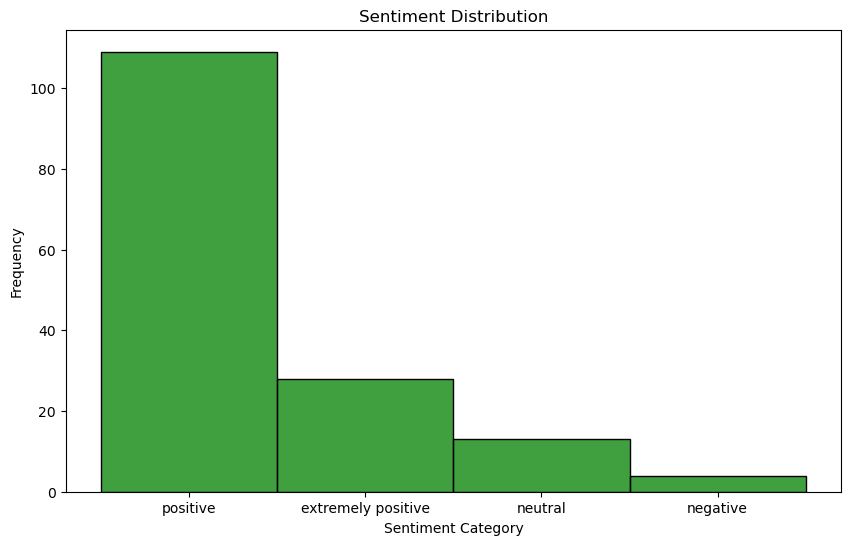

In [117]:
# Plot figure for Sentiment Distribution based on Sentiment Category
plt.figure(figsize=(10, 6))

# Ensure 'df1' is used instead of 'new_df1' if df1 contains Sentiment_Class
sns.histplot(x=df1['Sentiment_Class'], color='green')

plt.title('Sentiment Distribution')
plt.xlabel('Sentiment Category')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()



### Sentiment Distribution

The bar chart visualizes the **distribution of sentiment categories** in the dataset.  
- The **x-axis** represents various sentiment categories.  
- The **y-axis** shows the **frequency of occurrences** in each category.  

#### **Sentiment Categories:**
- **Positive**: The most frequent sentiment, with over **200 instances**.  
- **Extremely Positive**: Appears less frequently than "Positive".  
- **Neutral**: Occurs less often than both positive categories.  
- **Negative**: The least frequent sentiment in the dataset.  

The chart **clearly demonstrates** a strong inclination towards **positive sentiments**, with **"Positive" being the predominant category**, followed by **"Extremely Positive"**.  
Both **neutral and negative sentiments** occur much **less frequently**.


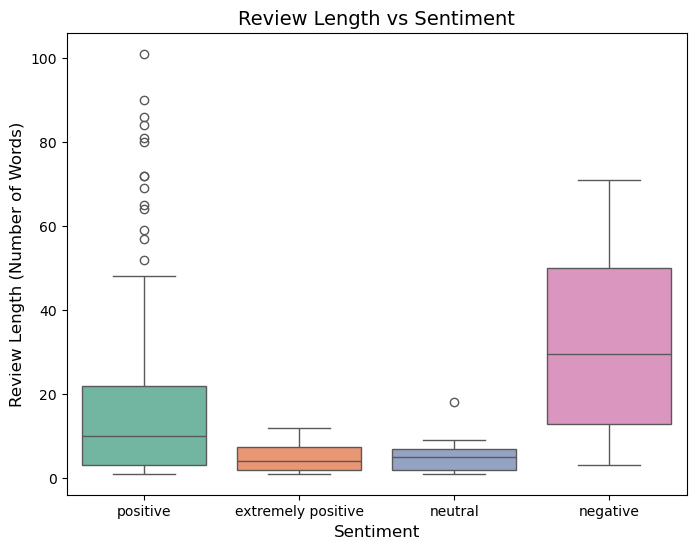

In [138]:
# Calculate review length by counting the number of words in each review
df1['Review_Length'] = df1['Review'].apply(lambda x: len(x.split()))

# Box Plot for Review Length by Sentiment
plt.figure(figsize=(8, 6))
sns.boxplot(x='Sentiment_Class', y='Review_Length', data=df1, hue='Sentiment_Class', palette='Set2')

# Set plot titles and labels
plt.title('Review Length vs Sentiment', fontsize=14)
plt.xlabel('Sentiment', fontsize=12)
plt.ylabel('Review Length (Number of Words)', fontsize=12)

# Show the plot
plt.show()


### Review Length vs Sentiment

#### **Correlation:**
- Reviews with **more positive sentiment** tend to align with **higher ratings** (e.g., **4.5–5 stars**), as demonstrated by the clustering and color gradient.

#### **Neutral Reviews:**
- **Neutral reviews** are spread across various ratings, suggesting that **sentiment does not always align** with the assigned star rating.

#### **Negative Reviews:**
- **Negative and extremely negative reviews** typically receive **lower ratings**, but they can still vary due to individual reviewer perspectives and subjective interpretation.


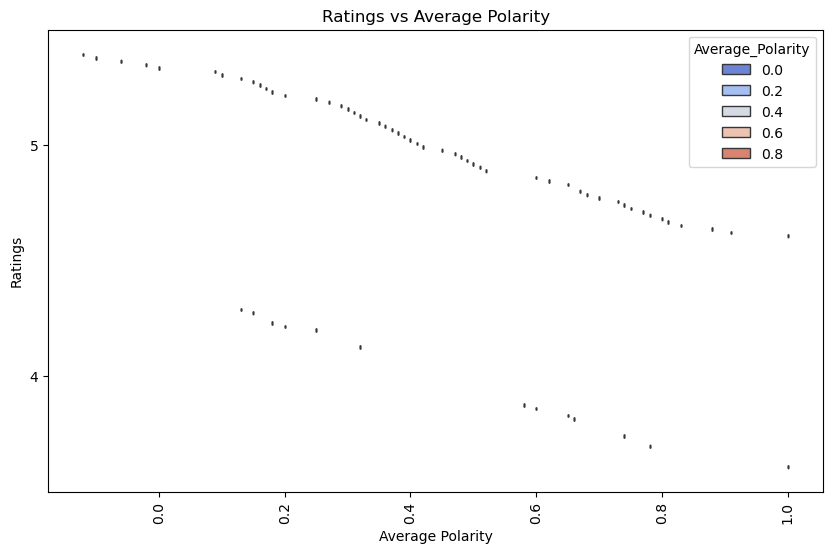

In [141]:
# Plotting ratings vs average polarity
plt.figure(figsize=(10, 6))

sns.boxplot(x='Average_Polarity', y='Ratings', data=df1, hue='Average_Polarity', palette='coolwarm')

# Set plot titles and labels
plt.title('Ratings vs Average Polarity')
plt.xlabel('Average Polarity')
plt.ylabel('Ratings')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.show()


### Ratings vs Average Polarity

#### **Positive Sentiment:**
- Shows the **widest variation** in review length, with a few notable **outliers**.
- The **median review length** is **higher** than that of other sentiment categories.

#### **Extremely Positive Sentiment:**
- Has the **shortest overall review lengths**, with a **tighter distribution** and **fewer outliers**.

#### **Neutral Sentiment:**
- Displays a **narrower range** of review lengths, similar to the **"Extremely Positive"** sentim

### Negative Sentiment:
- Exhibits a **moderate range** of review lengths.
- The **median length** is **shorter** than "Positive" but **longer** than both "Extremely Positive" and "Neutral."

### Interpretation:
- **Positive reviews** are generally **more detailed (longer)** compared to other sentiment categories.
- **Extremely positive** and **neutral reviews** are typically **short**.
- **Negative reviews** vary in length but tend to be **more concise** than positive ones.
--

## **Reporting: Summary  Findings**
### **Overview of Data Collection and Cleaning**
- **Data Source**: Customer reviews for the **iPhone 15 128GB** were gathered from **Flipkart** using web scraping techniques (**Selenium & BeautifulSoup**).
- **Data Preparation**:
  - Reviews were **preprocessed** by **removing unnecessary characters**, **standardizing text formatting**, and **eliminating excess spaces**.
  - **Text data was tokenized** for further analysis.
  - Sentiments were **categorized** into different labels (**positive, extremely positive, neutral, negative, extremely negative**) using **sentiment analysis methods**.

---

### **Sentiment Analysis Findings**
#### **Sentiment Breakdown:**
- A **majority** of the reviews expressed **positive sentiment**, followed by a smaller share of **extremely positive feedback**, as shown in the **sentiment distribution chart**.
- **Neutral** and **negative reviews** represented a **much smaller percentage** of the total feedback.

#### **Sentiment by Rating:**
- **Higher star ratings** were generally associated with **positive or extremely positive sentiments**.
- **Lower star ratings** tended to correspond with **more neutral or negative feedback**, signaling **dissatisfactio## **Key Insights**

### **Positive Aspects:**
- Customers frequently **praised the design, camera quality, and overall performance** of the **iPhone 15**.
- Many reviews highlighted **improvements in battery life** as a notable **positive feature**.

### **Common Complaints:**
- **Neutral and negative reviews** often pointed to **pricing issues** and occasional problems with **delivery or packaging**.
- A few customers mentioned **compatibility problems with certain accessories** and **minor software glitches**.

---

## **Recommendations**

### **Product Enhancements:**
- **Address minor software glitches** mentioned by users to improve the overall experience.
- Investigate and resolve **compatibility issues with accessories** to ensure a **smooth and hassle-free experience**.

### **Marketing Suggestions:**
- **Emphasize the camera quality, battery life, and sleek design** in future **marketing campaigns**.
- **Mitigate pricing concerns** by offering **EMI options, exchange offers, or time-limited discounts** to make the product more accessible.

### **Operational Improvements:**
- **Enhance delivery services** to **reduce complaints** related to **packaging or shipping delays**.
- Continuously **monitor customer feedback** to swiftly **identify and resolve any new issues** that arise.
n** among those customers.
ent group.
